# <center> SVM - Support Vector Machine </center>
## Support Vector Machine for Classification(SVC)

### Objective
To find a hyperplane that best separates the data into classes with the maximum margin (the greatest possible distance between the hyperplane and the closest data points from each class - called support vectors)

### Core Idea:
- The algorithm seeks the decision boundary (hyperplane) that maximizes the margin between classes.
- It uses only the support vectors (critical samples near the boundary) to define the classifier.
- Works well with linear and non-linear data using kernel tricks.

### Kernel Trick:
Allows SVM to work in higher-dimensional feature spaces without computing them explicity. Common kernel:
- Linear
- Polynomial
- RBF (Gaussian)
- Sigmoid

### Pros:
- Effective in high-dimensional spaces
- Works well with clear margin of separation
- Robust to overfitting (especially in high dimensions)

### Cons:
- Not suitable for very datasets
- Performance depends on the choice of kernel and hyperparameters.

## Support Vector Machine for Regression (SVR)

### Objective
To predict a continuous value while maintaining a margin of tolerance (epsilon-tube) where errors are ignored.

### Core Idea
- Instead of maximizing the margin between classes, SVR tries to fit the best flat function within a margin of the true outputs
- It ignores small errors (within margin) but penalizes errors beyond it
- Only points outside the margine - tube influence the model (analogous to support vectors in SVC).

### Kernel Trick
Same as in classification - SVR can use kernels to fit non-linear regression curves

### Pros:
- Good for small and medium datasets
- Provides flexibility to specify margin and control model complexity with C (penalty for points outside the tube)

### Cons:
- Sensitive to choice of hyperparameters
- Computationally expensive on large datasets

## Summary

|**Feature**|**SVC**|**SVR**|
|--|--|--|
|Task|Classification|Regression|
|Goal| Maximize margin between classes| Fit within tube-margin around targets|
|Error Handling|Misclassified points penalized|Errors outside margin-tube penalized|
|Output|Class Label|Continuous value|
|Loss Function|Hinge Loss|Margin-Insensitive Loss|
|Kernel Support|Yes|Yes| 

### Support Vector Regressor (SVR). 
#### Target: Number of Successful Breach Attemps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.pipeline import make_pipeline

from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data.csv', sep = ',')
data.head()

,Sector,CEO_Gender,Size,Security_Invest,Security_Breach_Att,Succ_Sec_Breaches,Sec_Rating,CEO_Sec_Exp,LOT_in_Business,Stock_Market
0,Banking,Female,Small,17,11,2,Medium,High,13,No
1,Banking,Male,Small,18,12,4,High,Low,9,No
2,Banking,Male,Small,17,12,4,High,Medium,22,No
3,Banking,Male,Small,24,13,1,High,Medium,3,Yes
4,Banking,Male,Small,32,14,3,High,Medium,4,Yes


In [3]:
def View(df):
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #eeeeee; color: #333; font-weight: bold }
    table thead th { background-color: #eee; color: #000; }
    tr, th, td { border: 1px solid #ccc; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 10px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'

    return(HTML(s+css))

In [4]:
View(data)

#### Prepare and Encode Dataset

In [5]:
X = data.drop(['Succ_Sec_Breaches'], axis = 1)
y = data['Succ_Sec_Breaches']

In [6]:
nominal_variable = ['Sector', 'Stock_Market', 'CEO_Gender']
ordinal_variable = ['Size', 'Sec_Rating', 'CEO_Sec_Exp']
numeric_variable = ['Security_Breach_Att', 'Security_Invest', 'LOT_in_Business']

preprocessor = ColumnTransformer(transformers = [
    ('categorical', OneHotEncoder(handle_unknown = 'ignore'), nominal_variable),
    ('ordinal', OrdinalEncoder(), ordinal_variable),
    ('numeric', StandardScaler(), numeric_variable)
])

#### Train the Model

In [7]:
def print_metrics(y_train, y_train_pred, y_test, y_test_pred):
    
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_pred)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
    print('Train RMSE: {:.3f}'.format(metrics.root_mean_squared_error(y_train, y_train_pred)))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_pred)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
    print('Test RMSE: {:.3f}'.format(metrics.root_mean_squared_error(y_test, y_test_pred)))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

svr_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel = 'rbf', C = 100, epsilon = 0.1))
])

svr_pipeline.fit(X_train, y_train)

y_train_pred = svr_pipeline.predict(X_train)
y_test_pred = svr_pipeline.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.999
Train MAE: 0.311
Train RMSE: 0.859


Test R^2: 0.864
Test MAE: 5.432
Test RMSE: 6.771


#### Conclusion:

The SVR model perform very well on training data and reasonably well on test data, but there is:
- A noticeable drop in performance (especially in MAE and RMSE)
- Potential mild overfitting and data issuess in the test set

#### Next steps

- Analyze residuals and prediction error distribution
- Tune hyperparameters
- Cross-validation for more robust evaluation

#### Analyze residuals and prediciton error distribution

In [9]:
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

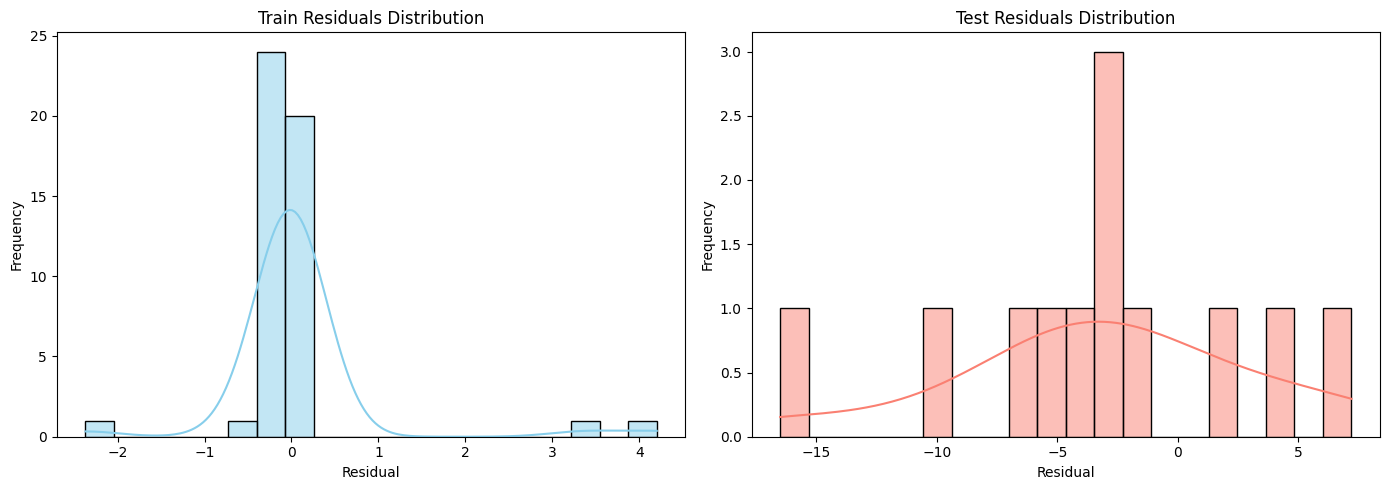

In [10]:
# Histogram of Residuals

plt.figure(figsize = (14, 5))

plt.subplot(121)
sns.histplot(train_residuals, kde = True, bins = 20, color = 'skyblue')
plt.title('Train Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.subplot(122)
sns.histplot(test_residuals, kde = True, bins = 20, color = 'salmon')
plt.title('Test Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show();

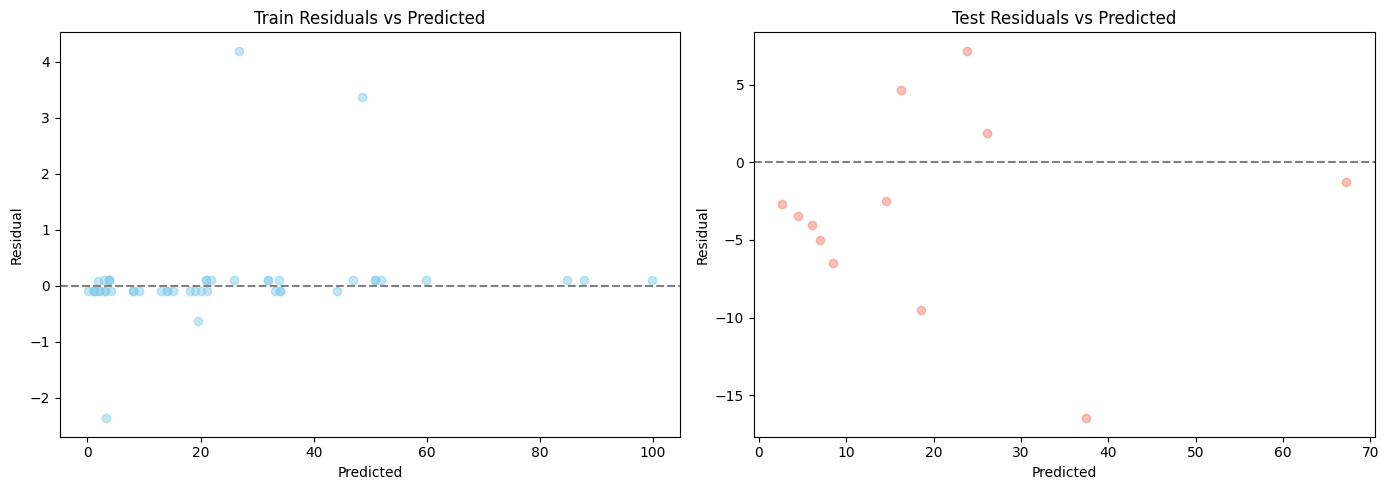

In [11]:
# Residuals vs Predicted Values

plt.figure(figsize = (14, 5))

plt.subplot(121)
plt.scatter(y_train_pred, train_residuals, alpha = 0.5, color = 'skyblue')
plt.axhline(0, color = 'gray', linestyle = '--')
plt.title('Train Residuals vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residual')

plt.subplot(122)
plt.scatter(y_test_pred, test_residuals, alpha = 0.5, color = 'salmon')
plt.axhline(0, color = 'gray', linestyle = '--')
plt.title('Test Residuals vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residual')

plt.tight_layout()
plt.show();

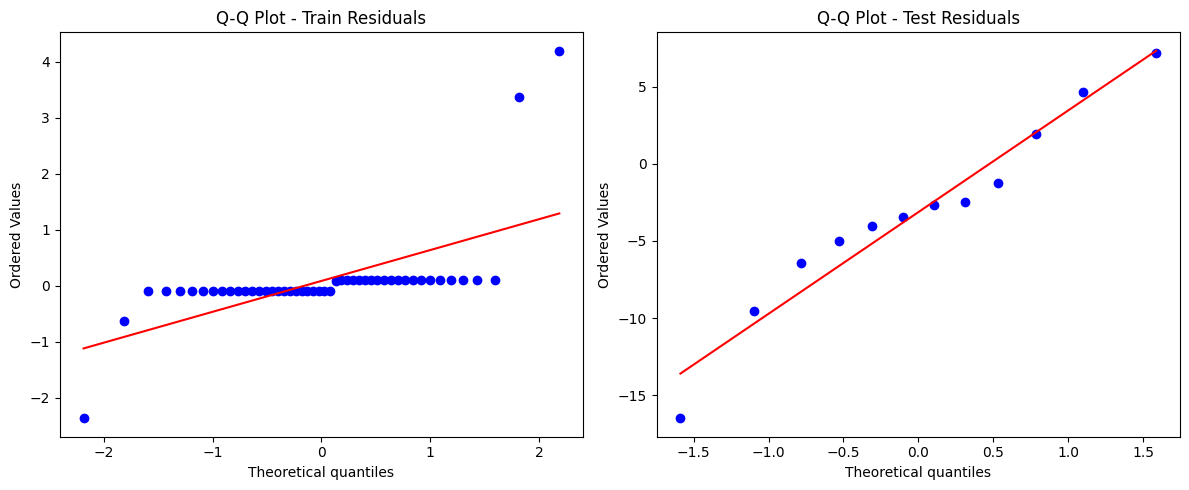

In [12]:
# Q-Q Plot for normality of residuals

plt.figure(figsize = (12, 5))

plt.subplot(121)
stats.probplot(train_residuals, dist = 'norm', plot = plt)
plt.title('Q-Q Plot - Train Residuals')

plt.subplot(122)
stats.probplot(test_residuals, dist = 'norm', plot = plt)
plt.title('Q-Q Plot - Test Residuals')

plt.tight_layout()
plt.show();

#### Conclusion:

|**Aspect**|**Train Set**|**Test Set**|
|--|--|--|
|Residual Shape|Normal-like|Skewed with heavy tails|
|Bias|Minimal|Moderate (especially under-prediction)|
|Heteroscedasticity|Absent|Present|
|Normality(Q-Q)|Mostly normal|Deviates from normal|
|Generalization|High|Decent but with room for improvement|

#### Hyperparameters tuning and Cross-validation

In [13]:
pipeline_grid = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

param_grid = {
    'regressor__C' : [0.1, 1, 10, 100],
    'regressor__epsilon' : [0.01, 0.1, 0.5, 1],
    'regressor__kernel' : ['rbf', 'linear', 'poly']
}

grid_search = GridSearchCV(
    pipeline_grid, param_grid, scoring = 'r2', cv = 5, n_jobs = -1, verbose = 2
)

grid_search.fit(X_train, y_train)

print('Best parameters found:')
print(grid_search.best_params_)

print('\nBest cross-validation R2 score:')
print(grid_search.best_score_)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found:
{'regressor__C': 100, 'regressor__epsilon': 1, 'regressor__kernel': 'linear'}

Best cross-validation R2 score:
0.8360110210937608


In [14]:
scores = cross_val_score(pipeline_grid, X, y, cv = 5, scoring = 'r2')
print('Cross-validated R2 scores:', scores)
print('Mean R2:', scores.mean())

Cross-validated R2 scores: [ 0.13830701  0.10332651 -0.36786114 -0.04369311 -0.05631571]
Mean R2: -0.045247289111978437


In [15]:
# Final model on best parameters

final_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', SVR(C = 100, epsilon = 1, kernel = 'rbf'))
])

final_pipeline.fit(X_train, y_train)

y_train_pred = final_pipeline.predict(X_train)
y_test_pred = final_pipeline.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.997
Train MAE: 1.071
Train RMSE: 1.204


Test R^2: 0.857
Test MAE: 5.740
Test RMSE: 6.943


### Support Vector Classifier (SVC). 
#### Target: Security Rating

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
data = pd.read_csv('Data.csv', sep = ',')

#### Prepare and Encode Dataset

In [18]:
X = data.drop('Sec_Rating', axis = 1)
y = data['Sec_Rating']

# Define features by type

ordinal_variable = ['Size', 'CEO_Sec_Exp']
nominal_variable = ['Sector', 'Stock_Market', 'CEO_Gender']
numeric_variable = ['Security_Invest', 'Security_Breach_Att', 'Succ_Sec_Breaches', 'LOT_in_Business']

# Define ordinal categories (assumed order based on context)

ordinal_categories = [
    ['Small', 'Medium', 'Large'],
    ['Low', 'Medium', 'High']
]

preprocessor = ColumnTransformer(transformers = [
    ('ordinal', OrdinalEncoder(categories = ordinal_categories), ordinal_variable),
    ('nominal', OneHotEncoder(handle_unknown = 'ignore'), nominal_variable),
    ('numeric', StandardScaler(), numeric_variable)
])

#### Train the Model

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42, stratify = y)

svc_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

svc_pipeline.fit(X_train, y_train)

y_train_pred = svc_pipeline.predict(X_train)
y_test_pred = svc_pipeline.predict(X_test)

report_train = classification_report(y_train, y_train_pred, target_names = ['Low', 'Medium', 'High'])
report_test = classification_report(y_test, y_test_pred, target_names = ['Low', 'Medium', 'High'])

print('Train', report_train)
print('\n')
print('Test', report_test)

Train               precision    recall  f1-score   support

         Low       0.72      0.76      0.74        17
      Medium       1.00      0.36      0.53        14
        High       0.60      0.88      0.71        17

    accuracy                           0.69        48
   macro avg       0.77      0.67      0.66        48
weighted avg       0.76      0.69      0.67        48



Test               precision    recall  f1-score   support

         Low       0.40      0.50      0.44         4
      Medium       1.00      0.33      0.50         3
        High       0.67      0.80      0.73         5

    accuracy                           0.58        12
   macro avg       0.69      0.54      0.56        12
weighted avg       0.66      0.58      0.58        12



#### Hyperparameters tuning and cross-validation

In [20]:
param_dist = {
    'classifier__C' : np.logspace(-2, 2, 10),
    'classifier__gamma' : ['scale', 'auto'] + list(np.logspace(-3, 1, 5)),
    'classifier__kernel' : ['rbf']
}

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(
    estimator = svc_pipeline,
    param_distributions = param_dist,
    n_iter = 30,
    scoring = 'accuracy',
    cv = cv,
    verbose = 2, n_jobs = -1, random_state = 42
)

random_search.fit(X_train, y_train)

print('Best parameters found:')
print(random_search.best_params_)

print('\nBest cross-validation accuracy:')
print(random_search.best_score_)

best_model = random_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print('\nTest Set Evaluation')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('\nTrain', classification_report(y_train, y_train_pred))
print('\Test', classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:
{'classifier__kernel': 'rbf', 'classifier__gamma': np.float64(0.01), 'classifier__C': np.float64(4.6415888336127775)}

Best cross-validation accuracy:
0.4622222222222222

Test Set Evaluation
Confusion Matrix:
[[2 0 2]
 [3 0 0]
 [3 0 2]]

Train               precision    recall  f1-score   support

        High       0.50      0.76      0.60        17
         Low       0.80      0.29      0.42        14
      Medium       0.53      0.53      0.53        17

    accuracy                           0.54        48
   macro avg       0.61      0.53      0.52        48
weighted avg       0.60      0.54      0.52        48

\Test               precision    recall  f1-score   support

        High       0.25      0.50      0.33         4
         Low       0.00      0.00      0.00         3
      Medium       0.50      0.40      0.44         5

    accuracy                           0.33        12
   macro avg

In [21]:
# Final model with balanced classes

final_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel = 'rbf', class_weight = 'balanced', gamma = 0.01, C = 4.64))
])

final_pipeline.fit(X_train, y_train)

y_train_pred = final_pipeline.predict(X_train)
y_test_pred = final_pipeline.predict(X_test)

report_train = classification_report(y_train, y_train_pred, target_names = ['Low', 'Medium', 'High'])
report_test = classification_report(y_test, y_test_pred, target_names = ['Low', 'Medium', 'High'])

print('Train', report_train)
print('\n')
print('Test', report_test)

Train               precision    recall  f1-score   support

         Low       0.52      0.76      0.62        17
      Medium       0.78      0.50      0.61        14
        High       0.50      0.41      0.45        17

    accuracy                           0.56        48
   macro avg       0.60      0.56      0.56        48
weighted avg       0.59      0.56      0.56        48



Test               precision    recall  f1-score   support

         Low       0.29      0.50      0.36         4
      Medium       1.00      0.33      0.50         3
        High       0.50      0.40      0.44         5

    accuracy                           0.42        12
   macro avg       0.60      0.41      0.44        12
weighted avg       0.55      0.42      0.43        12



#### Conclusion:

Overfitting was reduced in the final model. Training accuracy dropped from 96% (tuned) --> 56%. F1 scores are now closer between train and test --> better generalization. Class_weight = balanced helped to improve recall for minority classes.

Overall performance is still modest. Model still struggles with class separation, likely due to:
- small sample size
- possible feature overlap or noise
- class imbalance, even after weighting.

|**Observation**|**Suggestion**|
|--|--|
|Small Dataset|Use simplier models, or try data augmentation / synthetic samples(e.g. SMOTE)|
|Performance capped|The tree-based models like RandomForest or GradientBoosting|
|High class confusion|Consider feature selection or dimensionality reduction (PCA)|
|Multi-class SVM is struggling|Test One-vs-Rest Classifiers with Logistic Regression or RandomForest|

#### Visualization of Final Model Results

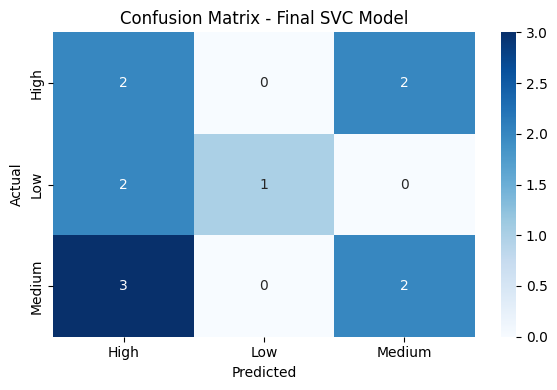

In [22]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_test_pred, labels = final_pipeline.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues',
            xticklabels=final_pipeline.classes_,
            yticklabels=final_pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Final SVC Model')
plt.tight_layout()
plt.show();

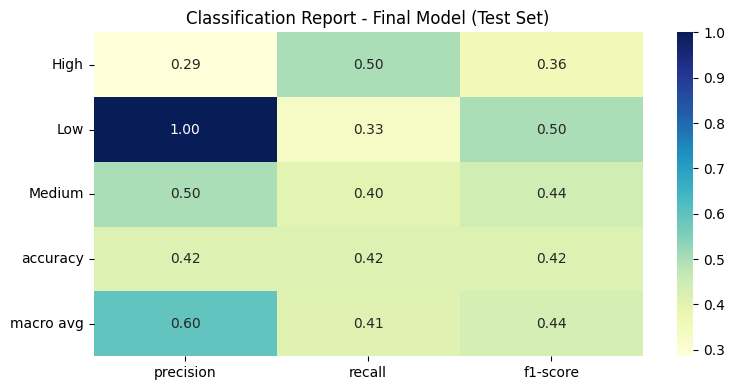

In [23]:
# Classification Report

report_dict = classification_report(y_test, y_test_pred, target_names = final_pipeline.classes_, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Classification Report - Final Model (Test Set)')
plt.tight_layout()
plt.show();

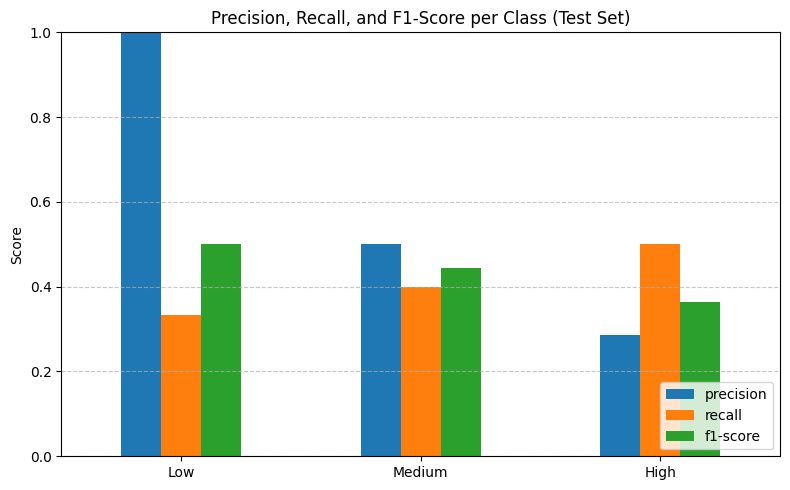

In [24]:
# Bar Plot of Precision / Recall / F1 per Class

metrics = ['precision', 'recall', 'f1-score']
classes = ['Low', 'Medium', 'High']
scores = [[report_dict[cls][metric] for metric in metrics] for cls in classes]

scores_df = pd.DataFrame(scores, columns=metrics, index=classes)

scores_df.plot(kind='bar', figsize=(8, 5))
plt.title("Precision, Recall, and F1-Score per Class (Test Set)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();